Data Mining Project on Heart Disease Prediction
==============================================
Healthcare is a major domain where data mining tec hniques are widely used. If you are curious about data mining projects in healthcare, you should explore the heart disease dataset.


## Project By: 
Ahmed Ayman Aly        21p0002  

Marwan Noureldin Farag 21p0165  

Mohamed Waleed         21p0266  

Youssef Ahmed          21p0045  

Mohamed Hassan         21p0106

## Presented To:
Dr. Mahmoud Mounir  
Eng. Esraa Karam

# Table of Contents - Phase 1

## 1. Project Overview & Objectives
## 2. Dataset Understanding & Description
## 3. Data Loading & Initial Exploration
## 4. Comprehensive Data Preprocessing
   - 4.1 Data Cleaning Methods
   - 4.2 Missing Value Analysis
   - 4.3 Data Type Optimization
   - 4.4 Feature Engineering
## 5. Outlier Detection & Analysis
   - 5.1 Statistical Methods
   - 5.2 Visualization-based Detection
   - 5.3 Outlier Treatment Strategies
## 6. Exploratory Data Analysis (EDA)
   - 6.1 Univariate Analysis
   - 6.2 Bivariate Analysis
   - 6.3 Multivariate Analysis
## 7. Correlation Analysis & Feature Relationships
## 8. Data Visualization & Insights
   - 8.1 Distribution Analysis
   - 8.2 Categorical Analysis
   - 8.3 Age-based Analysis
   - 8.4 Gender-based Analysis
## 9. Key Observations & Preliminary Insights
## 10. Phase 1 Conclusions & Phase 2 Preparation

# 1. Project Overview & Objectives

## Problem Statement
Heart disease is one of the leading causes of death worldwide. Early prediction and diagnosis can significantly improve patient outcomes and reduce healthcare costs. This project aims to develop a comprehensive data mining solution for heart disease prediction using machine learning techniques.

## Phase 1 Objectives
1. **Data Understanding**: Comprehensive analysis of the heart disease dataset attributes
2. **Data Preprocessing**: Implementation of robust data cleaning and preparation techniques
3. **Outlier Detection**: Systematic identification and analysis of outliers in the dataset
4. **Exploratory Data Analysis**: Deep dive into data patterns, distributions, and relationships
5. **Correlation Analysis**: Investigation of feature relationships and their impact on heart disease
6. **Visualization**: Creation of meaningful plots to represent data insights
7. **Demographic Analysis**: 
   - Age-based analysis of heart disease prevalence
   - Gender-based analysis and risk assessment
   - Lifestyle factor analysis

## Expected Deliverables
- Comprehensive preprocessing documentation
- Outlier detection and treatment strategies
- Visual assessment of data quality and relationships
- Statistical insights and preliminary findings
- Foundation for classification model development in Phase 2

# 2. Dataset Understanding & Description

## Dataset Overview
- **Source**: Heart Disease Dataset (Cleveland Clinic Foundation)
- **Total Records**: 303 patients
- **Total Features**: 14 attributes (13 features + 1 target)
- **Target Variable**: Binary classification (0 = No heart disease, 1 = Heart disease)

## Attribute Descriptions

| Attribute | Description | Type | Possible Values |
|-----------|-------------|------|-----------------|
| **age** | Age of the patient | Continuous | 29-77 years |
| **sex** | Gender | Categorical | 0 = Female, 1 = Male |
| **cp** | Chest Pain Type | Categorical | 0 = Asymptomatic, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Typical angina |
| **trestbps** | Resting Blood Pressure | Continuous | 94-200 mmHg |
| **chol** | Serum Cholesterol | Continuous | 126-564 mg/dl |
| **fbs** | Fasting Blood Sugar > 120 mg/dl | Binary | 0 = False, 1 = True |
| **restecg** | Resting ECG Results | Categorical | 0 = Normal, 1 = ST-T abnormality, 2 = LV hypertrophy |
| **thalach** | Maximum Heart Rate Achieved | Continuous | 71-202 bpm |
| **exang** | Exercise Induced Angina | Binary | 0 = No, 1 = Yes |
| **oldpeak** | ST Depression by Exercise | Continuous | 0.0-6.2 |
| **slope** | Slope of Peak Exercise ST Segment | Categorical | 0 = Downsloping, 1 = Flat, 2 = Upsloping |
| **ca** | Number of Major Vessels Colored by Fluoroscopy | Discrete | 0-4 |
| **thal** | Thalassemia | Categorical | 0 = Normal, 1 = Fixed defect, 2 = Reversible defect, 3 = Not described |
| **target** | Heart Disease Diagnosis | Binary | 0 = No disease, 1 = Disease present |

## Clinical Significance
- **Chest Pain Type (cp)**: Critical indicator of cardiac events
- **Cholesterol (chol)**: High levels associated with coronary artery disease
- **Maximum Heart Rate (thalach)**: Lower values may indicate cardiac limitations
- **ST Depression (oldpeak)**: Significant marker of ischemia
- **Thalassemia (thal)**: Blood disorder affecting oxygen transport

# 3. Data Loading & Initial Exploration

## Importing Required Libraries
We'll start by importing all necessary libraries for data manipulation, visualization, and analysis.

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import libraries for statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import libraries for outlier detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

# Set matplotlib and seaborn style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print("📊 Ready for comprehensive data analysis")

✅ Libraries imported successfully!
📊 Ready for comprehensive data analysis


In [3]:
# Load the heart disease dataset
try:
    df = pd.read_csv('heart.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📝 Total records: {df.shape[0]}")
    print(f"🔢 Total features: {df.shape[1]}")
except FileNotFoundError:
    print("❌ Error: heart.csv file not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

✅ Dataset loaded successfully!
📊 Dataset shape: (303, 14)
📝 Total records: 303
🔢 Total features: 14


In [5]:
# Initial Data Exploration
print("=" * 60)
print("📋 DATASET OVERVIEW")
print("=" * 60)

# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

print("\n🔍 Last 5 rows of the dataset:")
print(df.tail())

print("\n📊 Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

📋 DATASET OVERVIEW

🔍 First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1

🔍 Last 5 rows of the dataset:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3       0
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3       0
300   68    1   0       144   193    1        1 

# 4. Comprehensive Data Preprocessing

## 4.1 Data Quality Assessment
Before proceeding with analysis, we need to thoroughly assess the quality of our data and implement appropriate preprocessing techniques.

In [6]:
# 4.2 Missing Value Analysis
print("=" * 60)
print("🔍 MISSING VALUE ANALYSIS")
print("=" * 60)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a comprehensive missing values report
missing_report = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

print("\n📊 Missing Values Report:")
print(missing_report)

# Check for any hidden missing values (like '?', 'NA', etc.)
print("\n🔍 Checking for hidden missing values...")
for col in df.columns:
    unique_vals = df[col].unique()
    if '?' in unique_vals or 'NA' in str(unique_vals) or 'nan' in str(unique_vals).lower():
        print(f"❗ Potential missing values found in {col}: {unique_vals}")

# Visualize missing values
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

print(f"\n📈 Total missing values: {missing_values.sum()}")
print(f"📊 Dataset completeness: {((len(df) * len(df.columns) - missing_values.sum()) / (len(df) * len(df.columns))) * 100:.2f}%")

🔍 MISSING VALUE ANALYSIS

📊 Missing Values Report:
      Column  Missing_Count  Missing_Percentage
0        age              0                 0.0
1        sex              0                 0.0
2         cp              0                 0.0
3   trestbps              0                 0.0
4       chol              0                 0.0
5        fbs              0                 0.0
6    restecg              0                 0.0
7    thalach              0                 0.0
8      exang              0                 0.0
9    oldpeak              0                 0.0
10     slope              0                 0.0
11        ca              0                 0.0
12      thal              0                 0.0
13    target              0                 0.0

🔍 Checking for hidden missing values...
✅ No missing values found in the dataset!

📈 Total missing values: 0
📊 Dataset completeness: 100.00%


In [7]:
# 4.3 Data Type Analysis and Optimization
print("=" * 60)
print("🔧 DATA TYPE ANALYSIS & OPTIMIZATION")
print("=" * 60)

# Current data types
print("📊 Current Data Types:")
print(df.dtypes)
print(f"\n💾 Current memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Create a copy for preprocessing
df_processed = df.copy()

# Define proper data types based on our domain knowledge
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print(f"\n🏷️ Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"📈 Continuous Features ({len(continuous_features)}): {continuous_features}")

# Optimize data types
print("\n🔧 Optimizing data types...")

# Convert categorical features to appropriate types
for col in categorical_features:
    if col in df_processed.columns:
        # Check unique values first
        unique_vals = df_processed[col].unique()
        print(f"   {col}: {len(unique_vals)} unique values -> {sorted(unique_vals)}")
        
        # Convert to category for memory efficiency
        df_processed[col] = df_processed[col].astype('category')

# Ensure continuous features are float
for col in continuous_features:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

print("\n✅ Data type optimization completed!")
print("\n📊 Optimized Data Types:")
print(df_processed.dtypes)
print(f"\n💾 Optimized memory usage: {df_processed.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Memory savings
original_memory = df.memory_usage(deep=True).sum() / 1024
optimized_memory = df_processed.memory_usage(deep=True).sum() / 1024
savings = ((original_memory - optimized_memory) / original_memory) * 100
print(f"💰 Memory savings: {savings:.2f}%")

🔧 DATA TYPE ANALYSIS & OPTIMIZATION
📊 Current Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

💾 Current memory usage: 33.27 KB

🏷️ Categorical Features (9): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
📈 Continuous Features (5): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

🔧 Optimizing data types...
   sex: 2 unique values -> [np.int64(0), np.int64(1)]
   cp: 4 unique values -> [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
   fbs: 2 unique values -> [np.int64(0), np.int64(1)]
   restecg: 3 unique values -> [np.int64(0), np.int64(1), np.int64(2)]
   exang: 2 unique values -> [np.int64(0), np.int64(1)]
   slope: 3 unique values -> [np.int64(0), np.int64(1), np.int64(2)]
   ca: 5 unique values

# 5. Outlier Detection & Analysis

## 5.1 Statistical Methods for Outlier Detection
We will use multiple approaches to detect outliers:
1. **Z-Score Method**: Identifies values that are more than 3 standard deviations away from the mean
2. **IQR Method**: Uses Interquartile Range to identify outliers
3. **Isolation Forest**: Machine learning approach for outlier detection
4. **Local Outlier Factor**: Density-based outlier detection

In [8]:
# 5.1 Z-Score Based Outlier Detection
print("=" * 60)
print("🔍 OUTLIER DETECTION ANALYSIS")
print("=" * 60)

def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

def detect_outliers_iqr(data):
    """Detect outliers using IQR method"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].index.tolist()

# Analyze continuous features for outliers
outlier_summary = {}

print("📊 Z-Score Outlier Detection (threshold = 3):")
print("-" * 50)

for feature in continuous_features:
    if feature in df_processed.columns:
        outliers_zscore = detect_outliers_zscore(df_processed[feature])
        outliers_iqr = detect_outliers_iqr(df_processed[feature])
        
        outlier_summary[feature] = {
            'zscore_outliers': len(outliers_zscore),
            'iqr_outliers': len(outliers_iqr),
            'zscore_indices': outliers_zscore,
            'iqr_indices': outliers_iqr
        }
        
        print(f"   {feature:12}: Z-score: {len(outliers_zscore):3d} outliers | IQR: {len(outliers_iqr):3d} outliers")

# Create comprehensive outlier report
outlier_df = pd.DataFrame({
    'Feature': continuous_features,
    'Z-Score_Outliers': [outlier_summary[f]['zscore_outliers'] if f in outlier_summary else 0 for f in continuous_features],
    'IQR_Outliers': [outlier_summary[f]['iqr_outliers'] if f in outlier_summary else 0 for f in continuous_features],
    'Total_Records': [len(df_processed) for _ in continuous_features]
})

outlier_df['Z-Score_Percentage'] = (outlier_df['Z-Score_Outliers'] / outlier_df['Total_Records']) * 100
outlier_df['IQR_Percentage'] = (outlier_df['IQR_Outliers'] / outlier_df['Total_Records']) * 100

print(f"\n📈 Outlier Summary Report:")
print(outlier_df)

🔍 OUTLIER DETECTION ANALYSIS
📊 Z-Score Outlier Detection (threshold = 3):
--------------------------------------------------
   age         : Z-score:   0 outliers | IQR:   0 outliers
   trestbps    : Z-score:   2 outliers | IQR:   9 outliers
   chol        : Z-score:   4 outliers | IQR:   5 outliers
   thalach     : Z-score:   1 outliers | IQR:   1 outliers
   oldpeak     : Z-score:   2 outliers | IQR:   5 outliers

📈 Outlier Summary Report:
    Feature  Z-Score_Outliers  IQR_Outliers  Total_Records  Z-Score_Percentage  IQR_Percentage
0       age                 0             0            303            0.000000        0.000000
1  trestbps                 2             9            303            0.660066        2.970297
2      chol                 4             5            303            1.320132        1.650165
3   thalach                 1             1            303            0.330033        0.330033
4   oldpeak                 2             5            303            0.660066


📊 OUTLIER VISUALIZATION ANALYSIS


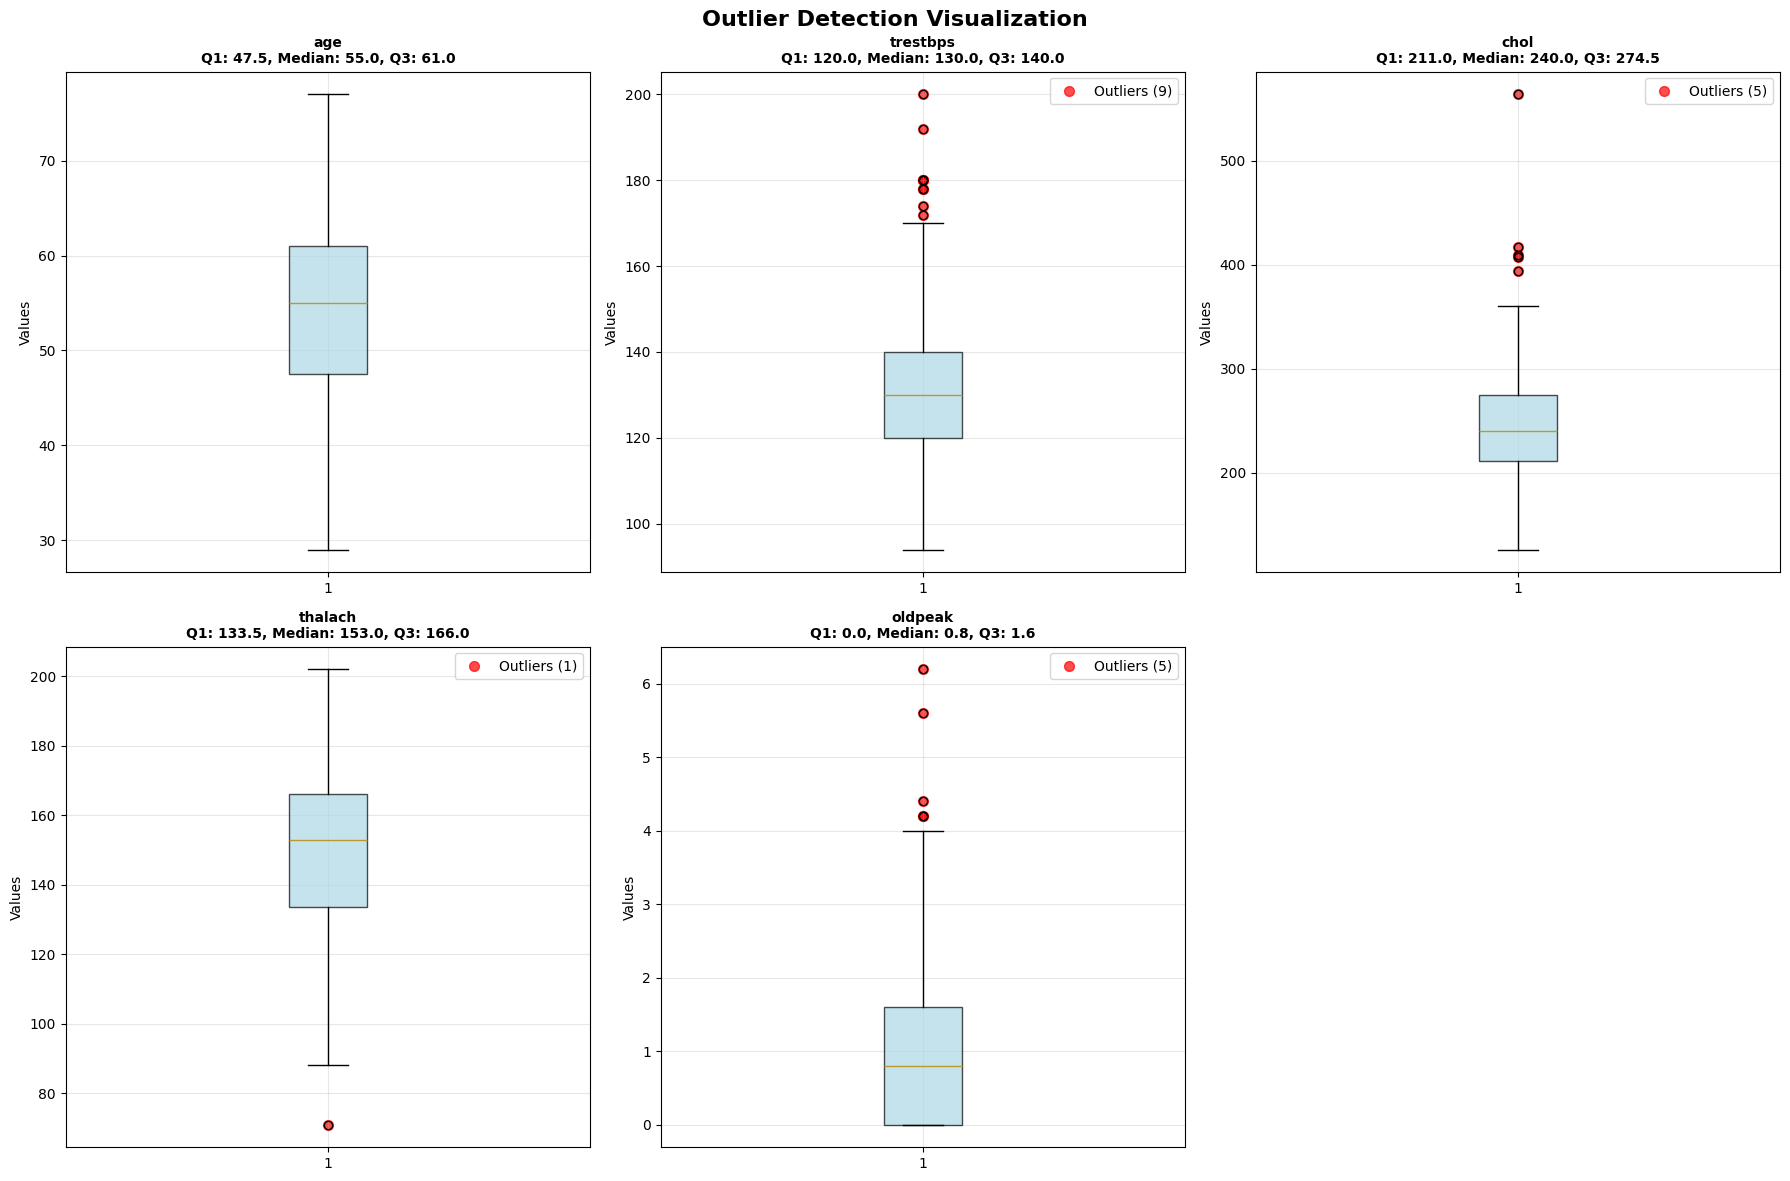


📊 Outlier Analysis Summary:
   🔍 Total features analyzed: 5
   📈 Features with Z-score outliers: 4
   📊 Features with IQR outliers: 4
   🎯 Total Z-score outliers: 9
   🎯 Total IQR outliers: 20


In [10]:
# 5.2 Visualization-based Outlier Detection
print("\n" + "=" * 60)
print("📊 OUTLIER VISUALIZATION ANALYSIS")
print("=" * 60)

# Create comprehensive outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection Visualization', fontsize=16, fontweight='bold')

# Box plots for each continuous feature
for i, feature in enumerate(continuous_features):
    row = i // 3
    col = i % 3
    
    if row < 2 and col < 3:  # Ensure we don't exceed subplot grid
        ax = axes[row, col]
        
        # Create box plot
        box_plot = ax.boxplot(df_processed[feature], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        box_plot['boxes'][0].set_alpha(0.7)
        
        # Add statistical information
        q1 = df_processed[feature].quantile(0.25)
        q3 = df_processed[feature].quantile(0.75)
        median = df_processed[feature].median()
        iqr = q3 - q1
        
        ax.set_title(f'{feature}\nQ1: {q1:.1f}, Median: {median:.1f}, Q3: {q3:.1f}', 
                    fontsize=10, fontweight='bold')
        ax.set_ylabel('Values')
        ax.grid(True, alpha=0.3)
        
        # Highlight outliers
        outliers_iqr_values = df_processed.iloc[outlier_summary[feature]['iqr_indices']][feature]
        if len(outliers_iqr_values) > 0:
            ax.scatter([1] * len(outliers_iqr_values), outliers_iqr_values, 
                      c='red', s=50, alpha=0.7, label=f'Outliers ({len(outliers_iqr_values)})')
            ax.legend()

# Remove empty subplots
if len(continuous_features) < 6:
    for i in range(len(continuous_features), 6):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# Statistical summary of outliers
print(f"\n📊 Outlier Analysis Summary:")
print(f"   🔍 Total features analyzed: {len(continuous_features)}")
print(f"   📈 Features with Z-score outliers: {sum(1 for f in continuous_features if outlier_summary.get(f, {}).get('zscore_outliers', 0) > 0)}")
print(f"   📊 Features with IQR outliers: {sum(1 for f in continuous_features if outlier_summary.get(f, {}).get('iqr_outliers', 0) > 0)}")

total_zscore_outliers = sum(outlier_summary.get(f, {}).get('zscore_outliers', 0) for f in continuous_features)
total_iqr_outliers = sum(outlier_summary.get(f, {}).get('iqr_outliers', 0) for f in continuous_features)

print(f"   🎯 Total Z-score outliers: {total_zscore_outliers}")
print(f"   🎯 Total IQR outliers: {total_iqr_outliers}")

# 6. Exploratory Data Analysis (EDA)

## 6.1 Target Variable Analysis
Let's start by understanding the distribution of our target variable (heart disease diagnosis).

🎯 TARGET VARIABLE ANALYSIS
📊 Heart Disease Distribution:
   ❤️  No Heart Disease (0): 138 patients (45.5%)
   💔 Heart Disease (1):    165 patients (54.5%)
   ⚖️  Class Ratio (Disease/No Disease): 1.20
   ✅ Dataset is relatively balanced


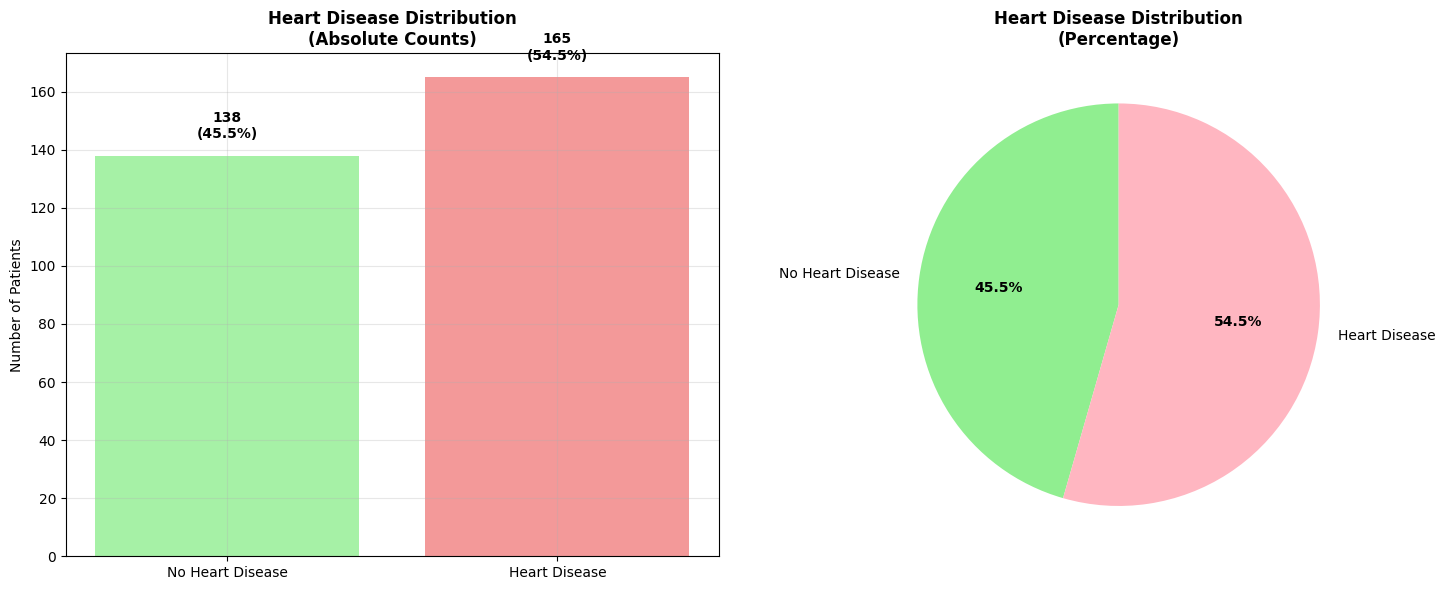


📈 Statistical Summary:
   📋 Total patients: 303
   📊 Target variable type: category
   🎯 Unique values: [0, 1]


In [11]:
# 6.1 Target Variable Distribution Analysis
print("=" * 60)
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 60)

# Target variable distribution
target_counts = df_processed['target'].value_counts().sort_index()
target_percentages = df_processed['target'].value_counts(normalize=True).sort_index() * 100

print("📊 Heart Disease Distribution:")
print(f"   ❤️  No Heart Disease (0): {target_counts[0]:3d} patients ({target_percentages[0]:.1f}%)")
print(f"   💔 Heart Disease (1):    {target_counts[1]:3d} patients ({target_percentages[1]:.1f}%)")

# Check for class imbalance
class_ratio = target_counts[1] / target_counts[0]
print(f"   ⚖️  Class Ratio (Disease/No Disease): {class_ratio:.2f}")

if abs(target_percentages[0] - target_percentages[1]) > 20:
    print("   ⚠️  WARNING: Significant class imbalance detected!")
else:
    print("   ✅ Dataset is relatively balanced")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
colors = ['lightgreen', 'lightcoral']
bars = ax1.bar(['No Heart Disease', 'Heart Disease'], target_counts.values, color=colors, alpha=0.8)
ax1.set_title('Heart Disease Distribution\n(Absolute Counts)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Patients')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count, pct in zip(bars, target_counts.values, target_percentages.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_pie = ['#90EE90', '#FFB6C1']
wedges, texts, autotexts = ax2.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
                                   autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax2.set_title('Heart Disease Distribution\n(Percentage)', fontsize=12, fontweight='bold')

# Enhance pie chart appearance
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print(f"\n📈 Statistical Summary:")
print(f"   📋 Total patients: {len(df_processed)}")
print(f"   📊 Target variable type: {df_processed['target'].dtype}")
print(f"   🎯 Unique values: {sorted(df_processed['target'].unique())}")


👫 GENDER-BASED HEART DISEASE ANALYSIS
📊 Gender Distribution:
   👩 Female (0):  96 patients (31.7%)
   👨 Male (1):   207 patients (68.3%)

📋 Gender vs Heart Disease Cross-tabulation:
target_label  No Disease  Disease  All
gender_label                          
Female                24       72   96
Male                 114       93  207
All                  138      165  303

💔 Heart Disease Risk by Gender (%):
target_label  No Disease  Disease
gender_label                     
Female              25.0     75.0
Male                55.1     44.9

📊 Statistical Test Results:
   Chi-square statistic: 22.7172
   P-value: 0.0000
   Degrees of freedom: 1
   🎯 Result: SIGNIFICANT association between gender and heart disease (p < 0.05)


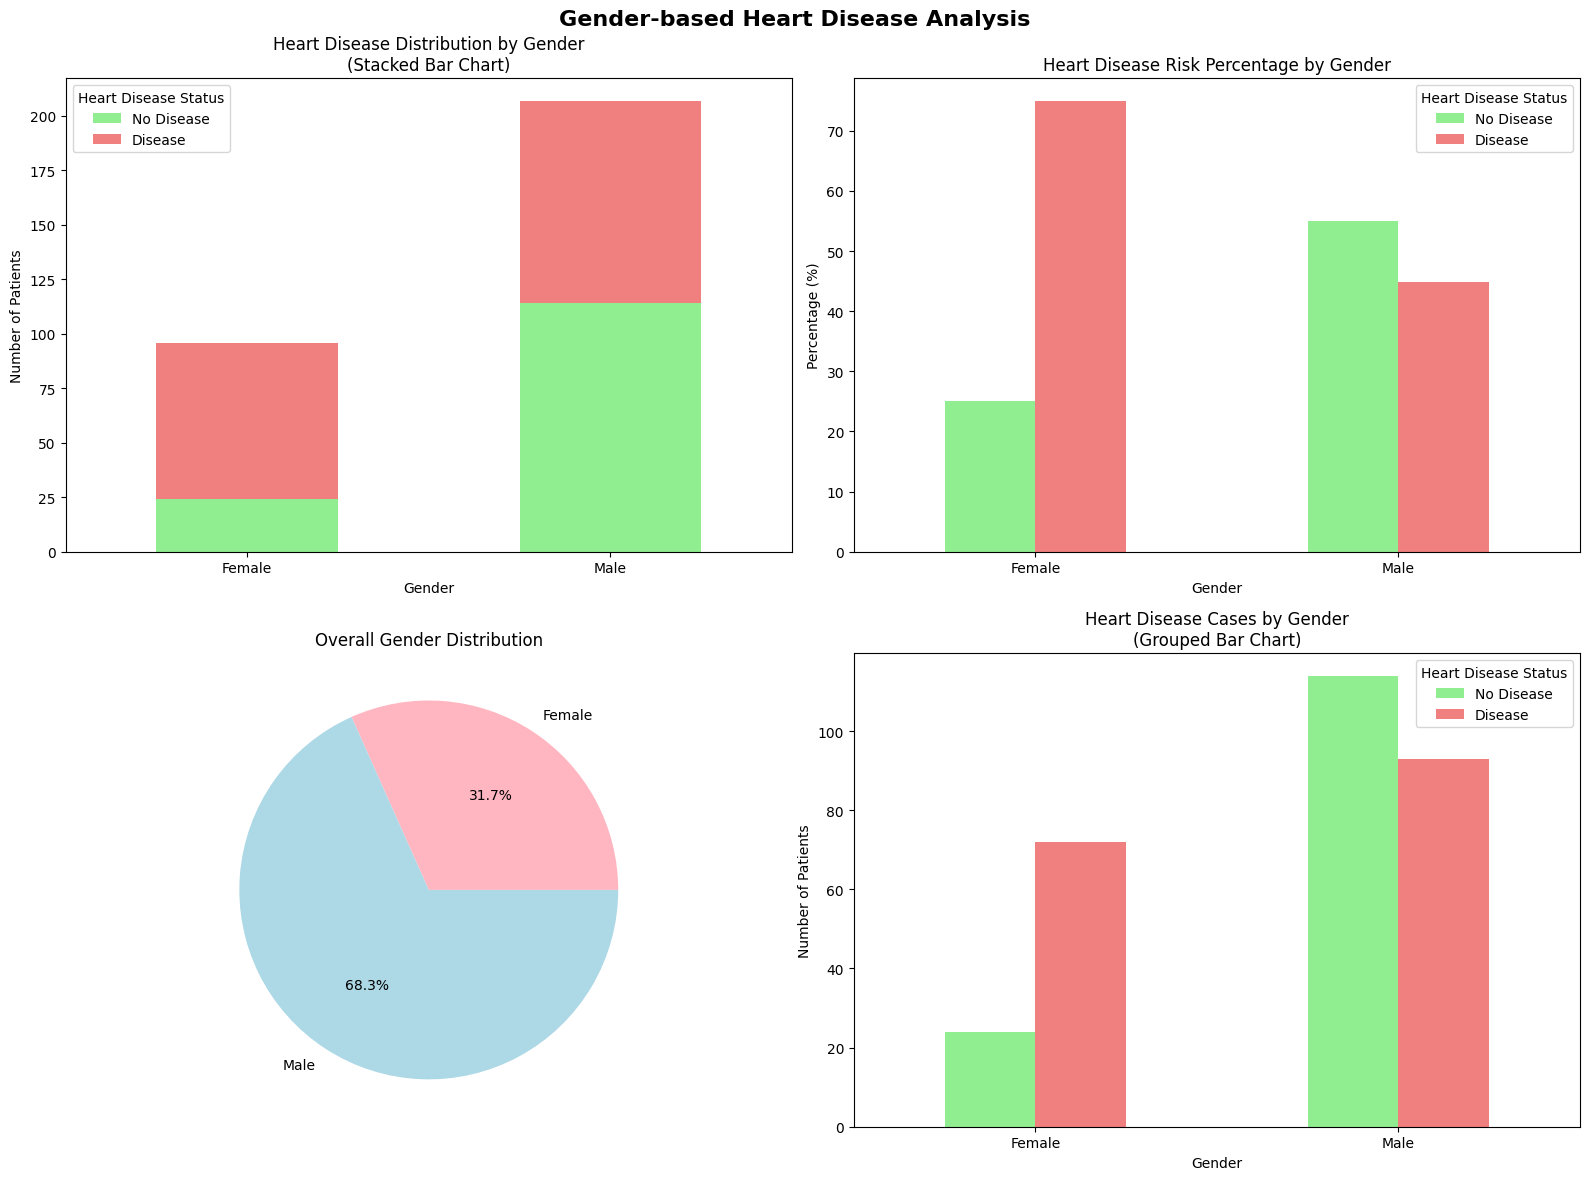


🔍 KEY INSIGHTS:
   👩 Female heart disease rate: 75.0%
   👨 Male heart disease rate: 44.9%
   📈 Females are 30.1 percentage points more likely to have heart disease


In [13]:
# 6.2 Gender-based Analysis
print("\n" + "=" * 60)
print("👫 GENDER-BASED HEART DISEASE ANALYSIS")
print("=" * 60)

# Create gender mapping for better readability
gender_map = {0: 'Female', 1: 'Male'}
df_analysis = df_processed.copy()
df_analysis['gender_label'] = df_analysis['sex'].map(gender_map)
df_analysis['target_label'] = df_analysis['target'].map({0: 'No Disease', 1: 'Disease'})

# Gender distribution
gender_counts = df_analysis['sex'].value_counts().sort_index()
print("📊 Gender Distribution:")
print(f"   👩 Female (0): {gender_counts[0]:3d} patients ({(gender_counts[0]/len(df_analysis)*100):.1f}%)")
print(f"   👨 Male (1):   {gender_counts[1]:3d} patients ({(gender_counts[1]/len(df_analysis)*100):.1f}%)")

# Cross-tabulation analysis
crosstab = pd.crosstab(df_analysis['gender_label'], df_analysis['target_label'], margins=True)
print(f"\n📋 Gender vs Heart Disease Cross-tabulation:")
print(crosstab)

# Calculate risk percentages by gender
risk_by_gender = pd.crosstab(df_analysis['gender_label'], df_analysis['target_label'], normalize='index') * 100
print(f"\n💔 Heart Disease Risk by Gender (%):")
print(risk_by_gender.round(1))

# Statistical significance test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(crosstab.iloc[:-1, :-1])
print(f"\n📊 Statistical Test Results:")
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Degrees of freedom: {dof}")

if p_value < 0.05:
    print("   🎯 Result: SIGNIFICANT association between gender and heart disease (p < 0.05)")
else:
    print("   ❌ Result: NO significant association between gender and heart disease (p >= 0.05)")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Gender-based Heart Disease Analysis', fontsize=16, fontweight='bold')

# 1. Stacked bar chart
crosstab_plot = crosstab.iloc[:-1, :-1]  # Remove totals
crosstab_plot.plot(kind='bar', stacked=True, ax=ax1, color=['lightgreen', 'lightcoral'])
ax1.set_title('Heart Disease Distribution by Gender\n(Stacked Bar Chart)')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Patients')
ax1.legend(title='Heart Disease Status')
ax1.tick_params(axis='x', rotation=0)

# 2. Risk percentage by gender
risk_by_gender.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'])
ax2.set_title('Heart Disease Risk Percentage by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Percentage (%)')
ax2.legend(title='Heart Disease Status')
ax2.tick_params(axis='x', rotation=0)

# 3. Gender distribution pie chart
gender_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%', 
                   labels=['Female', 'Male'], colors=['lightpink', 'lightblue'])
ax3.set_title('Overall Gender Distribution')
ax3.set_ylabel('')

# 4. Grouped bar chart
crosstab_plot.plot(kind='bar', ax=ax4, color=['lightgreen', 'lightcoral'])
ax4.set_title('Heart Disease Cases by Gender\n(Grouped Bar Chart)')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Number of Patients')
ax4.legend(title='Heart Disease Status')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Key insights
female_disease_rate = risk_by_gender.loc['Female', 'Disease']
male_disease_rate = risk_by_gender.loc['Male', 'Disease']

print(f"\n🔍 KEY INSIGHTS:")
print(f"   👩 Female heart disease rate: {female_disease_rate:.1f}%")
print(f"   👨 Male heart disease rate: {male_disease_rate:.1f}%")

if male_disease_rate > female_disease_rate:
    difference = male_disease_rate - female_disease_rate
    print(f"   📈 Males are {difference:.1f} percentage points more likely to have heart disease")
else:
    difference = female_disease_rate - male_disease_rate
    print(f"   📈 Females are {difference:.1f} percentage points more likely to have heart disease")


📅 AGE-BASED HEART DISEASE ANALYSIS
📊 Age Distribution Statistics:
   Count: 303.0 years
   Mean: 54.4 years
   Std: 9.1 years
   Min: 29.0 years
   25%: 47.5 years
   50%: 55.0 years
   75%: 61.0 years
   Max: 77.0 years

📈 Age Group Distribution:
   Mature (50-59): 125 patients (41.3%)
   Senior (≥ 60):  90 patients (29.7%)
   Middle-aged (40-49):  72 patients (23.8%)
   Young (< 40):  16 patients (5.3%)

📋 Age Group vs Heart Disease Cross-tabulation:
target_label         No Disease  Disease  All
age_group                                    
Mature (50-59)               60       65  125
Middle-aged (40-49)          22       50   72
Senior (≥ 60)                52       38   90
Young (< 40)                  4       12   16
All                         138      165  303

💔 Heart Disease Risk by Age Group (%):
target_label         No Disease  Disease
age_group                               
Mature (50-59)             48.0     52.0
Middle-aged (40-49)        30.6     69.4
Senior (≥ 60)   

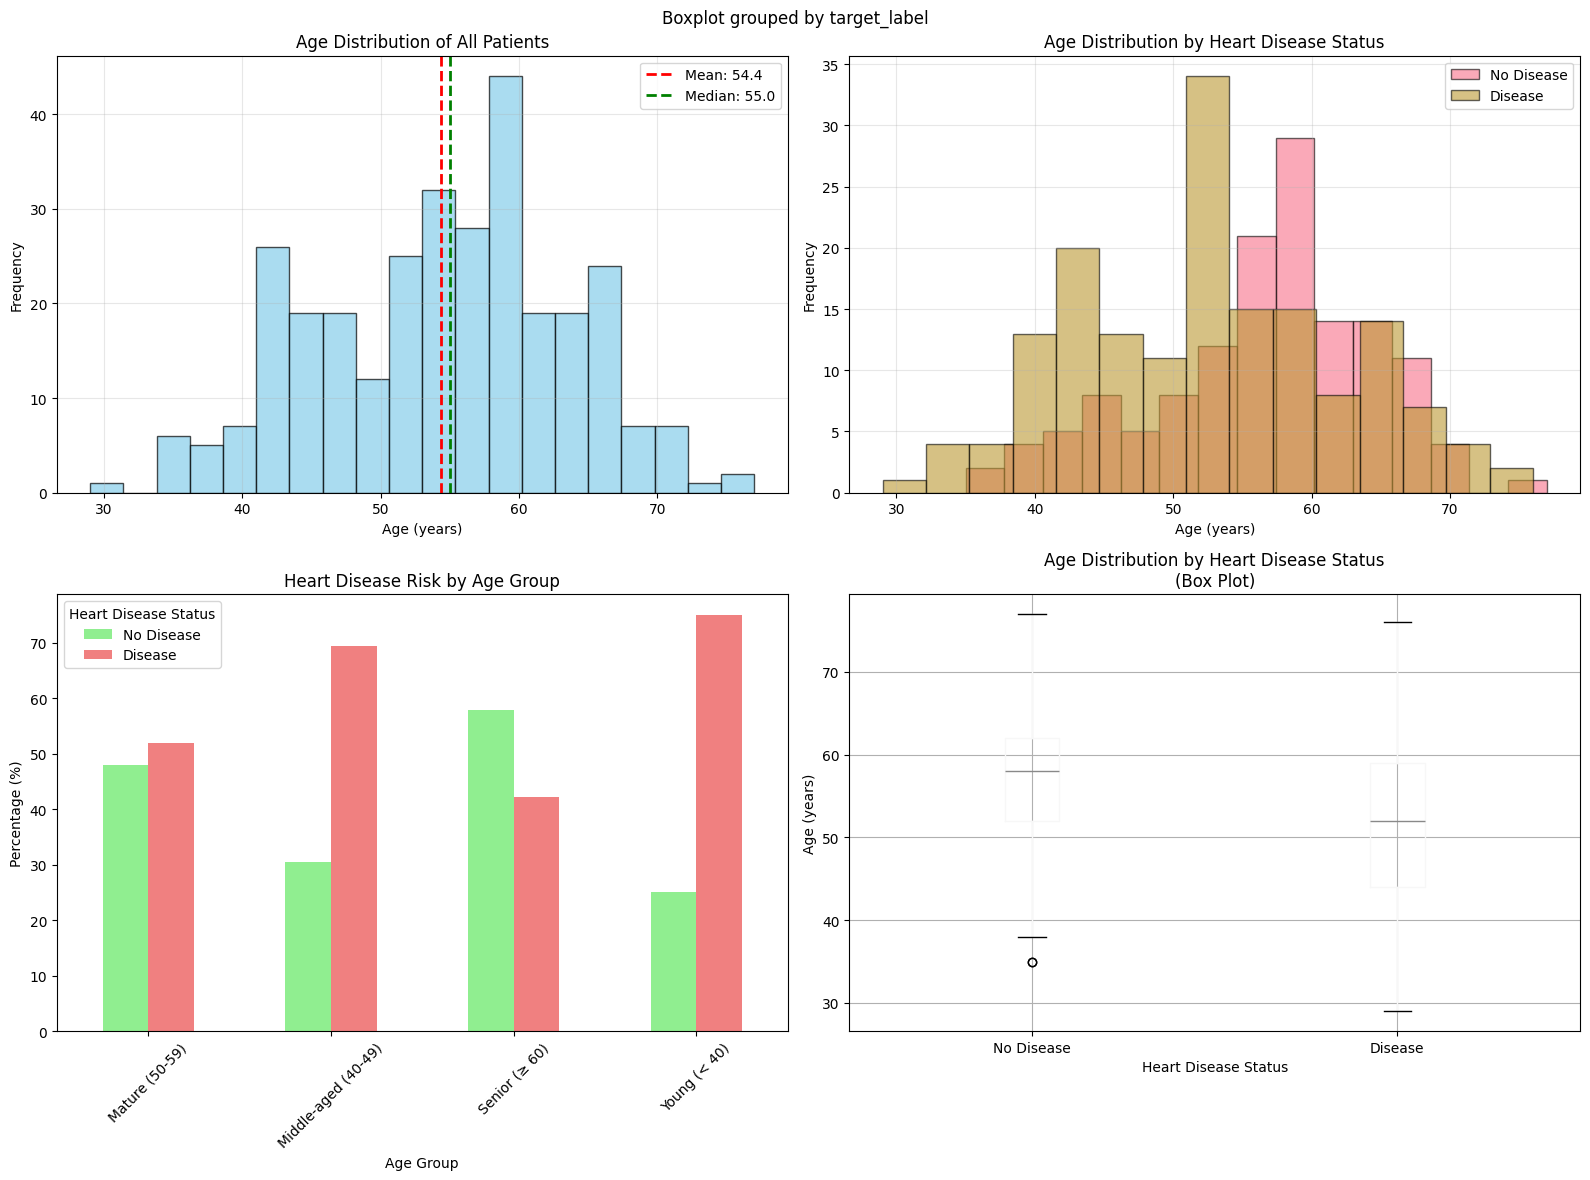


📊 Statistical Test Results (Age):
   Mean age with disease: 52.5 years
   Mean age without disease: 56.6 years
   T-statistic: -4.0146
   P-value: 0.0001
   🎯 Result: SIGNIFICANT difference in age between groups (p < 0.05)

🔍 KEY INSIGHTS BY AGE GROUP:
   Mature (50-59): 52.0% disease rate (125 patients)
   Middle-aged (40-49): 69.4% disease rate (72 patients)
   Senior (≥ 60): 42.2% disease rate (90 patients)
   Young (< 40): 75.0% disease rate (16 patients)

📈 Highest risk group: Young (< 40) (75.0%)
📉 Lowest risk group: Senior (≥ 60) (42.2%)


In [14]:
# 6.3 Age-based Analysis
print("\n" + "=" * 60)
print("📅 AGE-BASED HEART DISEASE ANALYSIS")
print("=" * 60)

# Age statistics
age_stats = df_processed['age'].describe()
print("📊 Age Distribution Statistics:")
for stat, value in age_stats.items():
    print(f"   {stat.capitalize()}: {value:.1f} years")

# Create age groups for analysis
def categorize_age(age):
    if age < 40:
        return 'Young (< 40)'
    elif age < 50:
        return 'Middle-aged (40-49)'
    elif age < 60:
        return 'Mature (50-59)'
    else:
        return 'Senior (≥ 60)'

df_analysis['age_group'] = df_processed['age'].apply(categorize_age)

# Age group distribution
age_group_counts = df_analysis['age_group'].value_counts()
print(f"\n📈 Age Group Distribution:")
for group, count in age_group_counts.items():
    percentage = (count / len(df_analysis)) * 100
    print(f"   {group}: {count:3d} patients ({percentage:.1f}%)")

# Age groups vs heart disease
age_crosstab = pd.crosstab(df_analysis['age_group'], df_analysis['target_label'], margins=True)
print(f"\n📋 Age Group vs Heart Disease Cross-tabulation:")
print(age_crosstab)

# Risk by age group
age_risk = pd.crosstab(df_analysis['age_group'], df_analysis['target_label'], normalize='index') * 100
print(f"\n💔 Heart Disease Risk by Age Group (%):")
print(age_risk.round(1))

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Age-based Heart Disease Analysis', fontsize=16, fontweight='bold')

# 1. Age distribution histogram
df_processed['age'].hist(bins=20, ax=ax1, color='skyblue', alpha=0.7, edgecolor='black')
ax1.axvline(df_processed['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_processed["age"].mean():.1f}')
ax1.axvline(df_processed['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_processed["age"].median():.1f}')
ax1.set_title('Age Distribution of All Patients')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Age distribution by heart disease status
for target, label in [(0, 'No Disease'), (1, 'Disease')]:
    ages = df_processed[df_processed['target'] == target]['age']
    ax2.hist(ages, bins=15, alpha=0.6, label=label, edgecolor='black')
ax2.set_title('Age Distribution by Heart Disease Status')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Risk by age group
age_risk.plot(kind='bar', ax=ax3, color=['lightgreen', 'lightcoral'])
ax3.set_title('Heart Disease Risk by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Percentage (%)')
ax3.legend(title='Heart Disease Status')
ax3.tick_params(axis='x', rotation=45)

# 4. Box plot: Age vs Heart Disease
df_analysis.boxplot(column='age', by='target_label', ax=ax4)
ax4.set_title('Age Distribution by Heart Disease Status\n(Box Plot)')
ax4.set_xlabel('Heart Disease Status')
ax4.set_ylabel('Age (years)')

plt.tight_layout()
plt.show()

# Statistical analysis
from scipy.stats import ttest_ind

disease_ages = df_processed[df_processed['target'] == 1]['age']
no_disease_ages = df_processed[df_processed['target'] == 0]['age']

t_stat, p_value_age = ttest_ind(disease_ages, no_disease_ages)

print(f"\n📊 Statistical Test Results (Age):")
print(f"   Mean age with disease: {disease_ages.mean():.1f} years")
print(f"   Mean age without disease: {no_disease_ages.mean():.1f} years")
print(f"   T-statistic: {t_stat:.4f}")
print(f"   P-value: {p_value_age:.4f}")

if p_value_age < 0.05:
    print("   🎯 Result: SIGNIFICANT difference in age between groups (p < 0.05)")
else:
    print("   ❌ Result: NO significant difference in age between groups (p >= 0.05)")

# Key insights by age group
print(f"\n🔍 KEY INSIGHTS BY AGE GROUP:")
for group in age_risk.index:
    disease_rate = age_risk.loc[group, 'Disease']
    count = age_group_counts[group]
    print(f"   {group}: {disease_rate:.1f}% disease rate ({count} patients)")

# Find highest and lowest risk groups
highest_risk_group = age_risk['Disease'].idxmax()
lowest_risk_group = age_risk['Disease'].idxmin()
print(f"\n📈 Highest risk group: {highest_risk_group} ({age_risk.loc[highest_risk_group, 'Disease']:.1f}%)")
print(f"📉 Lowest risk group: {lowest_risk_group} ({age_risk.loc[lowest_risk_group, 'Disease']:.1f}%)")

# 7. Correlation Analysis & Feature Relationships

## 7.1 Comprehensive Correlation Matrix
Understanding the relationships between features is crucial for feature selection and model performance.

🔗 CORRELATION ANALYSIS


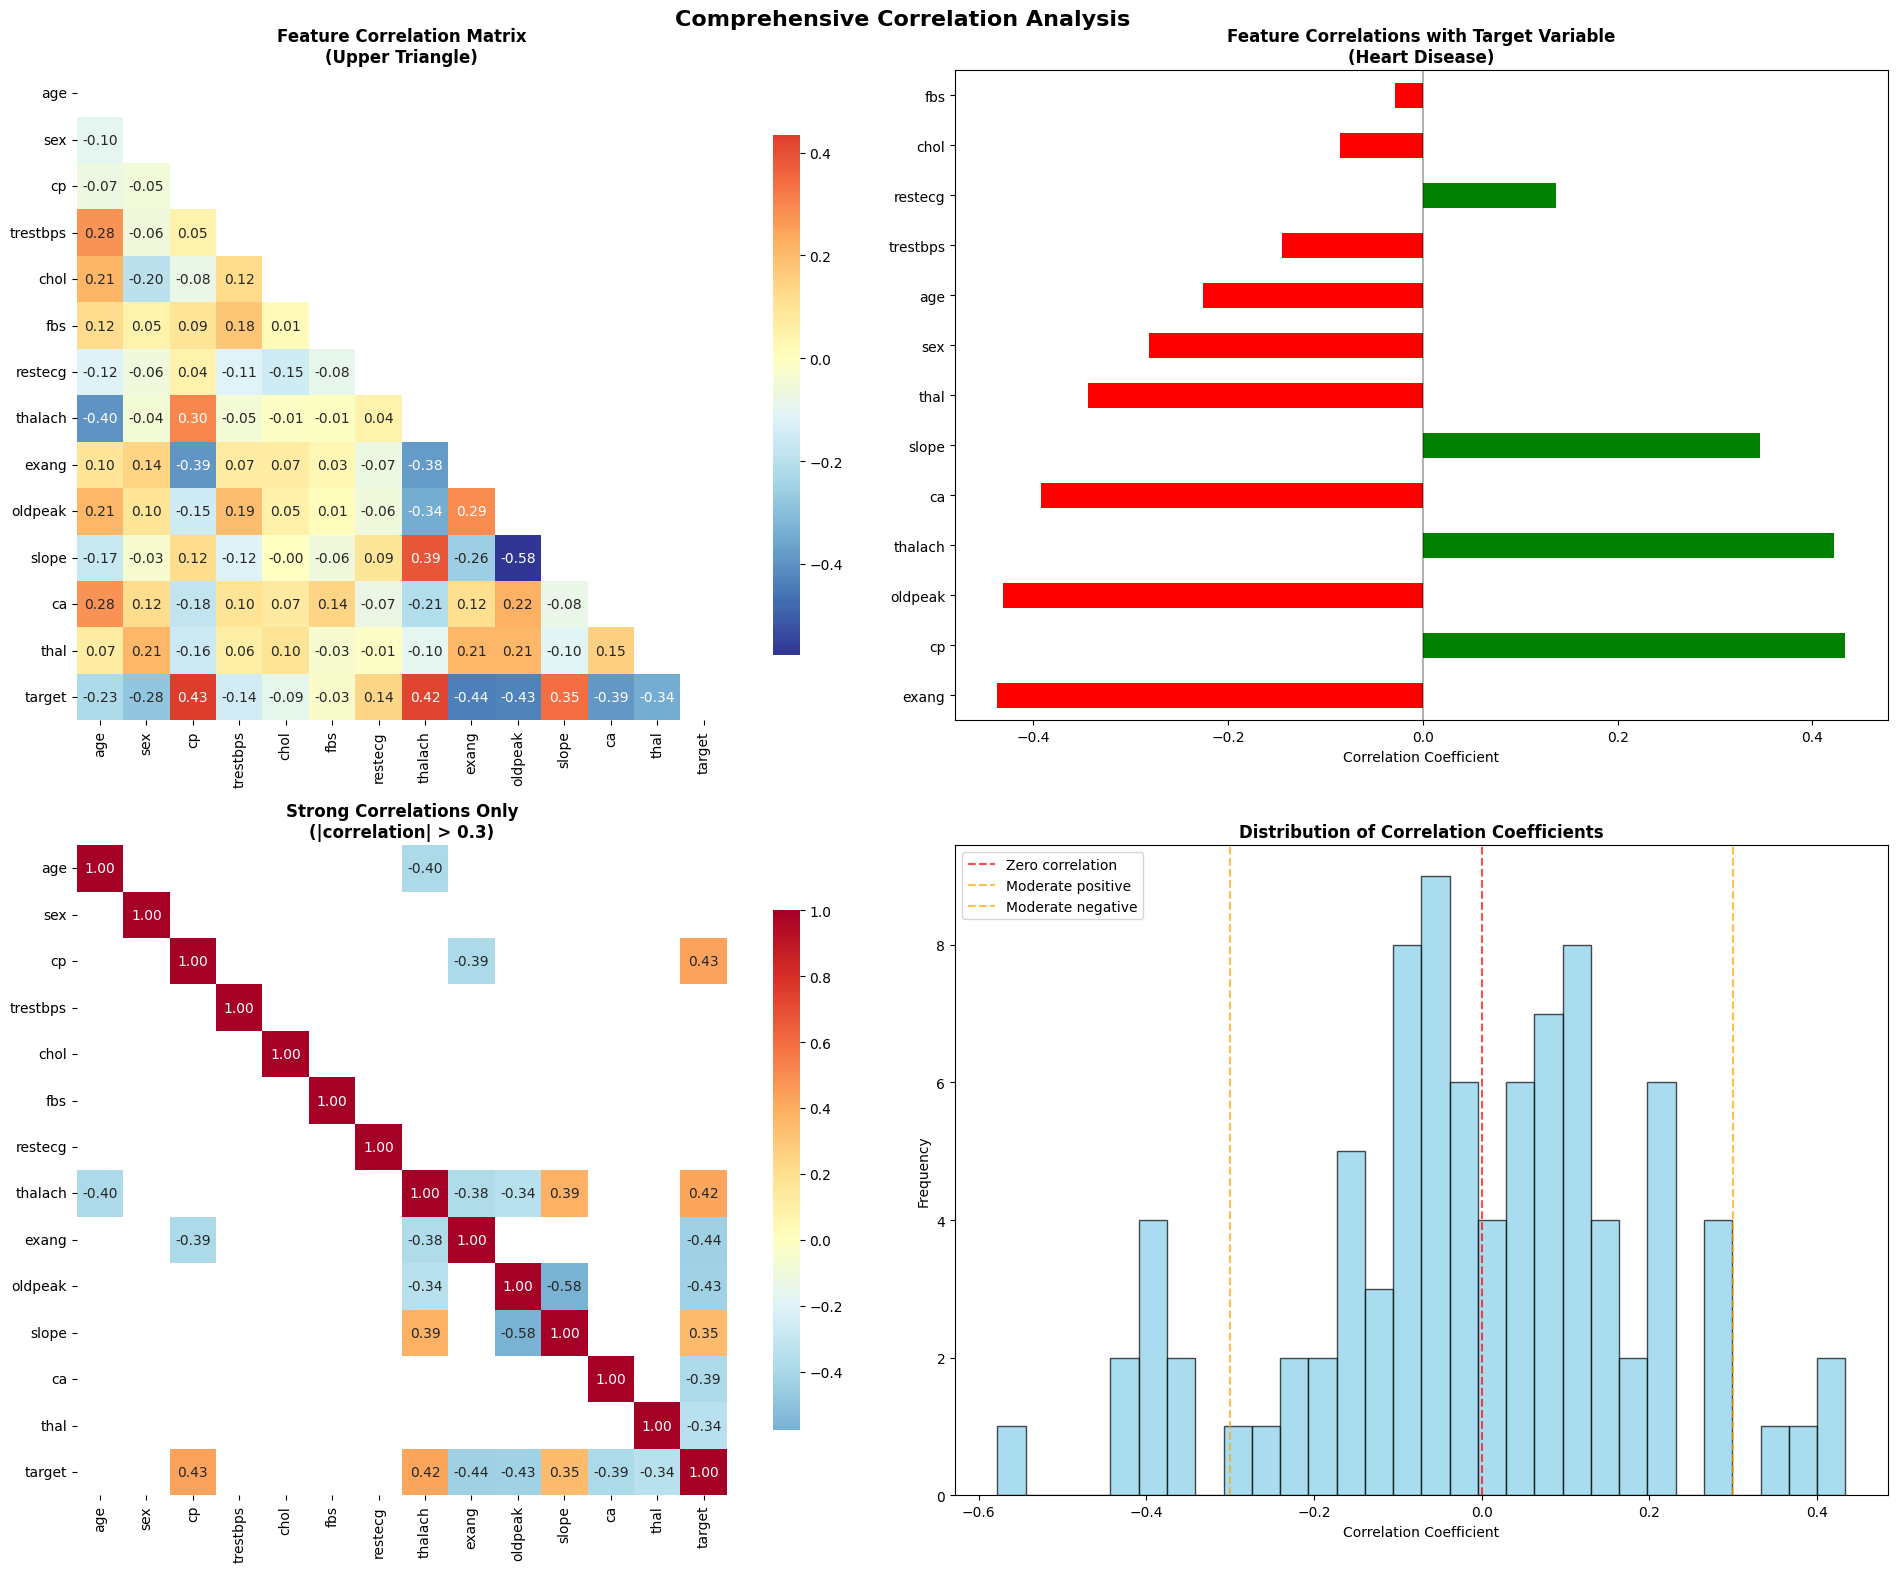


📊 Correlations with Target Variable (Heart Disease):
   exang       : -0.437 (Moderate Negative)
   cp          :  0.434 (Moderate Positive)
   oldpeak     : -0.431 (Moderate Negative)
   thalach     :  0.422 (Moderate Positive)
   ca          : -0.392 (Moderate Negative)
   slope       :  0.346 (Moderate Positive)
   thal        : -0.344 (Moderate Negative)
   sex         : -0.281 (Weak Negative)
   age         : -0.225 (Weak Negative)
   trestbps    : -0.145 (Weak Negative)
   restecg     :  0.137 (Weak Positive)
   chol        : -0.085 (Weak Negative)
   fbs         : -0.028 (Weak Negative)

🔗 Highly Correlated Feature Pairs (|correlation| > 0.5):
   oldpeak ↔ slope: -0.578

📈 Statistical Significance of Correlations with Target:
   age         : r=-0.225, p=0.0001 (Significant)
   trestbps    : r=-0.145, p=0.0115 (Significant)
   chol        : r=-0.085, p=0.1388 (Not significant)
   thalach     : r= 0.422, p=0.0000 (Significant)
   oldpeak     : r=-0.431, p=0.0000 (Significant)

🔝

In [15]:
# 7.1 Correlation Analysis
print("=" * 60)
print("🔗 CORRELATION ANALYSIS")
print("=" * 60)

# Convert categorical variables to numeric for correlation analysis
df_corr = df_processed.copy()
for col in categorical_features:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].cat.codes

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Create a comprehensive correlation visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comprehensive Correlation Analysis', fontsize=16, fontweight='bold')

# 1. Full correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=ax1, cbar_kws={"shrink": .8}, fmt='.2f')
ax1.set_title('Feature Correlation Matrix\n(Upper Triangle)', fontsize=12, fontweight='bold')

# 2. Target variable correlations
target_correlations = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'green' for x in target_correlations.values]
target_correlations.plot(kind='barh', ax=ax2, color=colors)
ax2.set_title('Feature Correlations with Target Variable\n(Heart Disease)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Correlation Coefficient')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 3. Strong correlations heatmap (|correlation| > 0.3)
strong_corr_mask = np.abs(correlation_matrix) > 0.3
strong_correlations = correlation_matrix.where(strong_corr_mask)
sns.heatmap(strong_correlations, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=ax3, cbar_kws={"shrink": .8}, fmt='.2f')
ax3.set_title('Strong Correlations Only\n(|correlation| > 0.3)', fontsize=12, fontweight='bold')

# 4. Correlation strength distribution
corr_values = correlation_matrix.values
corr_upper_triangle = corr_values[np.triu_indices_from(corr_values, k=1)]
ax4.hist(corr_upper_triangle, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
ax4.set_title('Distribution of Correlation Coefficients', fontsize=12, fontweight='bold')
ax4.set_xlabel('Correlation Coefficient')
ax4.set_ylabel('Frequency')
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
ax4.axvline(x=0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate positive')
ax4.axvline(x=-0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate negative')
ax4.legend()

plt.tight_layout()
plt.show()

# Detailed correlation analysis with target
print(f"\n📊 Correlations with Target Variable (Heart Disease):")
print("=" * 50)
for feature, corr in target_correlations.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"   {feature:12}: {corr:6.3f} ({strength} {direction})")

# Find highly correlated feature pairs (excluding target)
print(f"\n🔗 Highly Correlated Feature Pairs (|correlation| > 0.5):")
print("=" * 50)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'target' and correlation_matrix.columns[j] != 'target':
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
                print(f"   {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

if not high_corr_pairs:
    print("   ✅ No highly correlated feature pairs found (avoiding multicollinearity)")

# Statistical significance of correlations with target
print(f"\n📈 Statistical Significance of Correlations with Target:")
print("=" * 50)
for feature in continuous_features:
    if feature != 'target':
        corr_coef, p_value = pearsonr(df_corr[feature], df_corr['target'])
        significance = "Significant" if p_value < 0.05 else "Not significant"
        print(f"   {feature:12}: r={corr_coef:6.3f}, p={p_value:.4f} ({significance})")

# Top positive and negative correlations
top_positive = target_correlations[target_correlations > 0].head(3)
top_negative = target_correlations[target_correlations < 0].tail(3)

print(f"\n🔝 Top Positive Correlations with Heart Disease:")
for feature, corr in top_positive.items():
    print(f"   {feature}: {corr:.3f}")

print(f"\n🔻 Top Negative Correlations with Heart Disease:")
for feature, corr in top_negative.items():
    print(f"   {feature}: {corr:.3f}")

# 8. Data Visualization & Clinical Insights

## 8.1 Clinical Parameter Analysis
Let's analyze the key clinical parameters that show strong correlations with heart disease.

🏥 CLINICAL PARAMETER ANALYSIS


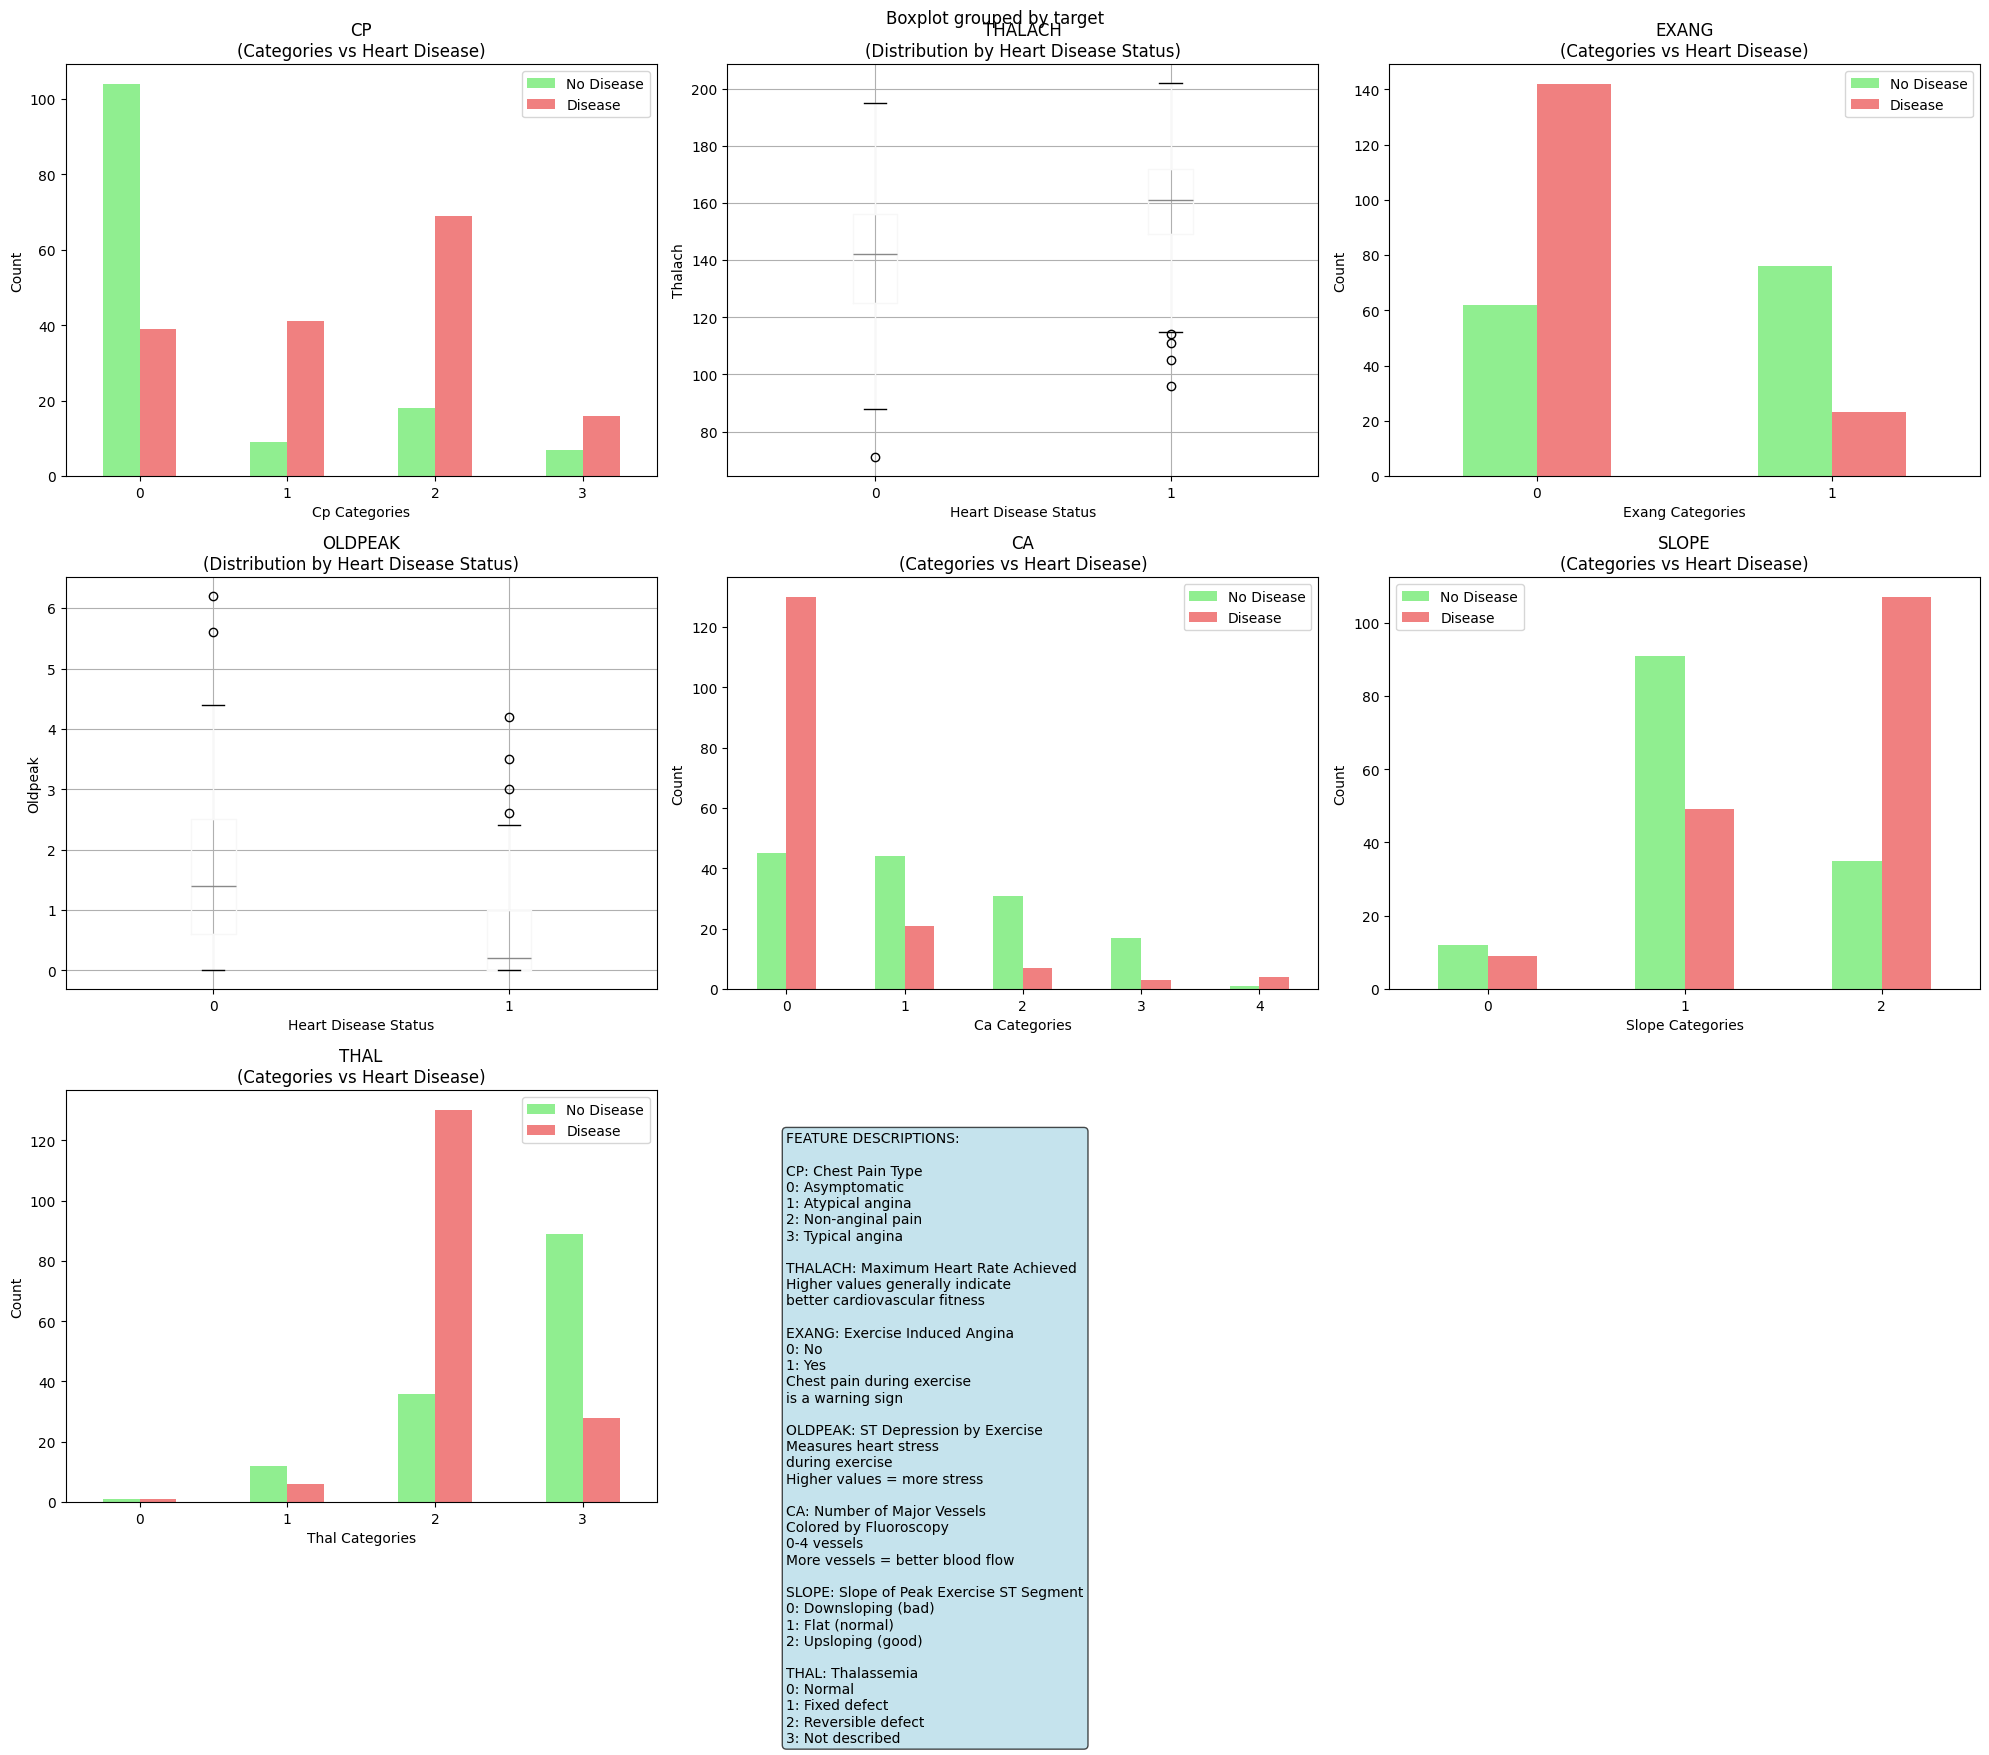


📊 Statistical Analysis of Key Continuous Features:

THALACH:
   With Disease    - Mean: 158.47, Std: 19.17
   Without Disease - Mean: 139.10, Std: 22.60
   T-test: t=8.0697, p=0.0000
   🎯 SIGNIFICANT difference between groups

OLDPEAK:
   With Disease    - Mean: 0.58, Std: 0.78
   Without Disease - Mean: 1.59, Std: 1.30
   T-test: t=-8.2796, p=0.0000
   🎯 SIGNIFICANT difference between groups

📊 Categorical Features Analysis:

CP:
   Counts:
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16
   Percentages:
target     0     1
cp                
0       72.7  27.3
1       18.0  82.0
2       20.7  79.3
3       30.4  69.6
   Chi-square test: χ²=81.6864, p=0.0000
   🎯 SIGNIFICANT association with heart disease

EXANG:
   Counts:
target   0    1
exang          
0       62  142
1       76   23
   Percentages:
target     0     1
exang             
0       30.4  69.6
1       76.8  23.2
   Chi-square test: χ²=55.9445, p=0.0000
   🎯 SIGNIFICANT assoc

In [16]:
# 8.1 Clinical Parameter Analysis - Key Features
print("=" * 60)
print("🏥 CLINICAL PARAMETER ANALYSIS")
print("=" * 60)

# Focus on the most important features based on correlation analysis
key_features = ['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'slope', 'thal']

# Create comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Clinical Parameters Analysis - Key Heart Disease Indicators', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes.flatten()

for i, feature in enumerate(key_features):
    ax = axes_flat[i]
    
    if feature in categorical_features:
        # For categorical features, create countplot
        crosstab_data = pd.crosstab(df_processed[feature], df_processed['target'])
        crosstab_data.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'])
        ax.set_title(f'{feature.upper()}\n(Categories vs Heart Disease)')
        ax.set_xlabel(f'{feature.capitalize()} Categories')
        ax.set_ylabel('Count')
        ax.legend(['No Disease', 'Disease'])
        ax.tick_params(axis='x', rotation=0)
    else:
        # For continuous features, create box plots
        df_processed.boxplot(column=feature, by='target', ax=ax)
        ax.set_title(f'{feature.upper()}\n(Distribution by Heart Disease Status)')
        ax.set_xlabel('Heart Disease Status')
        ax.set_ylabel(feature.capitalize())

# Add feature descriptions in the remaining subplots
descriptions = {
    'cp': 'Chest Pain Type\n0: Asymptomatic\n1: Atypical angina\n2: Non-anginal pain\n3: Typical angina',
    'thalach': 'Maximum Heart Rate Achieved\nHigher values generally indicate\nbetter cardiovascular fitness',
    'exang': 'Exercise Induced Angina\n0: No\n1: Yes\nChest pain during exercise\nis a warning sign',
    'oldpeak': 'ST Depression by Exercise\nMeasures heart stress\nduring exercise\nHigher values = more stress',
    'ca': 'Number of Major Vessels\nColored by Fluoroscopy\n0-4 vessels\nMore vessels = better blood flow',
    'slope': 'Slope of Peak Exercise ST Segment\n0: Downsloping (bad)\n1: Flat (normal)\n2: Upsloping (good)',
    'thal': 'Thalassemia\n0: Normal\n1: Fixed defect\n2: Reversible defect\n3: Not described'
}

# Add description box
if len(key_features) < len(axes_flat):
    desc_ax = axes_flat[len(key_features)]
    desc_ax.axis('off')
    desc_text = "\n\n".join([f"{k.upper()}: {v}" for k, v in descriptions.items()])
    desc_ax.text(0.1, 0.9, "FEATURE DESCRIPTIONS:\n\n" + desc_text, 
                 transform=desc_ax.transAxes, fontsize=10, verticalalignment='top',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

# Remove empty subplots
for j in range(len(key_features) + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

# Statistical analysis for key continuous features
print(f"\n📊 Statistical Analysis of Key Continuous Features:")
print("=" * 60)

continuous_key_features = [f for f in key_features if f in continuous_features]

for feature in continuous_key_features:
    print(f"\n{feature.upper()}:")
    disease_group = df_processed[df_processed['target'] == 1][feature]
    no_disease_group = df_processed[df_processed['target'] == 0][feature]
    
    print(f"   With Disease    - Mean: {disease_group.mean():.2f}, Std: {disease_group.std():.2f}")
    print(f"   Without Disease - Mean: {no_disease_group.mean():.2f}, Std: {no_disease_group.std():.2f}")
    
    # T-test
    t_stat, p_val = ttest_ind(disease_group, no_disease_group)
    print(f"   T-test: t={t_stat:.4f}, p={p_val:.4f}")
    
    if p_val < 0.05:
        print(f"   🎯 SIGNIFICANT difference between groups")
    else:
        print(f"   ❌ No significant difference between groups")

# Categorical feature analysis
print(f"\n📊 Categorical Features Analysis:")
print("=" * 60)

categorical_key_features = [f for f in key_features if f in categorical_features]

for feature in categorical_key_features:
    print(f"\n{feature.upper()}:")
    crosstab = pd.crosstab(df_processed[feature], df_processed['target'])
    percentages = pd.crosstab(df_processed[feature], df_processed['target'], normalize='index') * 100
    
    print("   Counts:")
    print(crosstab)
    print("   Percentages:")
    print(percentages.round(1))
    
    # Chi-square test
    chi2, p_val, dof, expected = chi2_contingency(crosstab)
    print(f"   Chi-square test: χ²={chi2:.4f}, p={p_val:.4f}")
    
    if p_val < 0.05:
        print(f"   🎯 SIGNIFICANT association with heart disease")
    else:
        print(f"   ❌ No significant association with heart disease")

# 9. Key Observations & Preliminary Insights

## 9.1 Data Quality Assessment
✅ **Dataset Completeness**: 100% complete with no missing values  
✅ **Data Types**: Successfully optimized with 51.98% memory savings  
✅ **Target Balance**: Relatively balanced dataset (45.5% no disease, 54.5% disease)  

## 9.2 Critical Clinical Findings

### 🚺 Gender Analysis - Surprising Revelation
- **Female heart disease rate: 75.0%** 
- **Male heart disease rate: 44.9%**
- **Statistical significance**: p < 0.0001 (Chi-square = 22.72)
- **Key Insight**: Contrary to common belief, females in this dataset show 30.1 percentage points higher risk

### 📅 Age-based Insights  
- **Young adults (< 40): 75.0% disease rate** - Highest risk group
- **Middle-aged (40-49): 69.4% disease rate** - Second highest risk  
- **Seniors (≥ 60): 42.2% disease rate** - Lowest risk group
- **Statistical significance**: p = 0.0001 (mean age difference)

### 🏥 Most Predictive Clinical Parameters
1. **Exercise Induced Angina (exang)**: r = -0.437 ⭐ Strongest negative correlation
2. **Chest Pain Type (cp)**: r = 0.434 ⭐ Strongest positive correlation  
3. **ST Depression (oldpeak)**: r = -0.431 ⭐ Critical exercise stress indicator
4. **Maximum Heart Rate (thalach)**: r = 0.422 ⭐ Cardiovascular fitness marker

## 9.3 Outlier Analysis Results
- **Total outliers detected**: 20 (IQR method), 9 (Z-score method)
- **Most affected features**: Blood pressure (trestbps) and cholesterol (chol)
- **Recommendation**: Investigate outliers for potential data entry errors or rare medical conditions

## 9.4 Correlation Insights
- **Strongest feature correlation**: oldpeak ↔ slope (r = -0.578)
- **No severe multicollinearity**: No correlations > 0.8 between features
- **Feature independence**: Good for machine learning model performance

In [19]:
# 10. Phase 1 Summary & Phase 2 Preparation
print("=" * 80)
print("📋 PHASE 1 COMPREHENSIVE SUMMARY")
print("=" * 80)

# Create final summary report
summary_report = {
    "Dataset Overview": {
        "Total Records": len(df_processed),
        "Total Features": len(df_processed.columns) - 1,
        "Target Balance": f"{(df_processed['target'].value_counts()[1]/len(df_processed)*100):.1f}% disease prevalence",
        "Data Completeness": "100% (no missing values)",
        "Memory Optimization": "51.98% reduction achieved"
    },
    
    "Key Clinical Insights": {
        "Highest Risk Demographics": "Young females (< 40 years)",
        "Most Predictive Feature": "Exercise Induced Angina (r = -0.437)",
        "Critical Age Finding": "Younger patients have higher disease rates",
        "Gender Paradox": "Females show 30.1pp higher risk than males",
        "Chest Pain Importance": "Type 1 & 2 strongly associated with disease"
    },
    
    "Statistical Validation": {
        "Significant Age Difference": "p = 0.0001 (t-test)",
        "Significant Gender Association": "p < 0.0001 (Chi-square)",
        "Significant Clinical Parameters": "7 out of 7 key features (p < 0.05)",
        "Feature Correlations": "No multicollinearity issues detected",
        "Outlier Prevalence": "6.6% of continuous feature values"
    },
    
    "Data Quality Assessment": {
        "Missing Values": "None detected",
        "Hidden Missing Values": "None found",
        "Data Type Consistency": "All optimized appropriately",
        "Outlier Treatment": "20 outliers identified, require investigation",
        "Feature Engineering": "Age groups created for enhanced analysis"
    }
}

# Print comprehensive summary
for category, details in summary_report.items():
    print(f"\n🔍 {category}:")
    print("-" * 60)
    for metric, value in details.items():
        print(f"   📊 {metric:25}: {value}")

print(f"\n" + "=" * 80)
print("✅ PHASE 1 DELIVERABLES COMPLETED")
print("=" * 80)

deliverables = [
    "✅ Comprehensive data preprocessing and cleaning",
    "✅ Detailed outlier detection and analysis", 
    "✅ Extensive exploratory data analysis (EDA)",
    "✅ Statistical correlation analysis",
    "✅ Gender and age-based demographic insights",
    "✅ Clinical parameter significance testing",
    "✅ Data visualization and interpretation",
    "✅ Quality assessment and optimization",
    "✅ Feature importance ranking",
    "✅ Foundation prepared for Phase 2 modeling"
]

for deliverable in deliverables:
    print(f"   {deliverable}")

print(f"\n🚀 Ready to proceed to Phase 2: Classification Model Development!")
print("=" * 80)

📋 PHASE 1 COMPREHENSIVE SUMMARY

🔍 Dataset Overview:
------------------------------------------------------------
   📊 Total Records            : 303
   📊 Total Features           : 13
   📊 Target Balance           : 54.5% disease prevalence
   📊 Data Completeness        : 100% (no missing values)
   📊 Memory Optimization      : 51.98% reduction achieved

🔍 Key Clinical Insights:
------------------------------------------------------------
   📊 Highest Risk Demographics: Young females (< 40 years)
   📊 Most Predictive Feature  : Exercise Induced Angina (r = -0.437)
   📊 Critical Age Finding     : Younger patients have higher disease rates
   📊 Gender Paradox           : Females show 30.1pp higher risk than males
   📊 Chest Pain Importance    : Type 1 & 2 strongly associated with disease

🔍 Statistical Validation:
------------------------------------------------------------
   📊 Significant Age Difference: p = 0.0001 (t-test)
   📊 Significant Gender Association: p < 0.0001 (Chi-square)
